In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Chargement des données
Chargement les différents jeux de données.
Préciser le nombre d'observations de chacun d'eux, la période étudiée, etc.

--- CH4 ---
Nombre d'observations : 499
Période : 1983 - 2025
   year  month   decimal  average  average_unc    trend  trend_unc
0  1983      7  1983.542  1625.96         2.19  1635.15       1.42
     year  month   decimal  average  average_unc    trend  trend_unc
498  2025      1  2025.042  1935.33        -9.99  1934.96      -9.99

--- CO2 ---
Nombre d'observations : 806
Période : 1958 - 2025
   year  month  decimal date  average  deseasonalized  ndays  sdev   unc
0  1958      3     1958.2027   315.71          314.44     -1 -9.99 -0.99
     year  month  decimal date  average  deseasonalized  ndays  sdev   unc
805  2025      4     2025.2917   429.64          427.11     23  0.73  0.29

--- N2O ---
Nombre d'observations : 289
Période : 2001 - 2025
   year  month   decimal  average  average_unc   trend  trend_unc
0  2001      1  2001.042    316.3         0.15  316.03       0.15
     year  month   decimal  average  average_unc   trend  trend_unc
288  2025      1  2025.042   338.42        -

<Axes: ylabel='Frequency'>

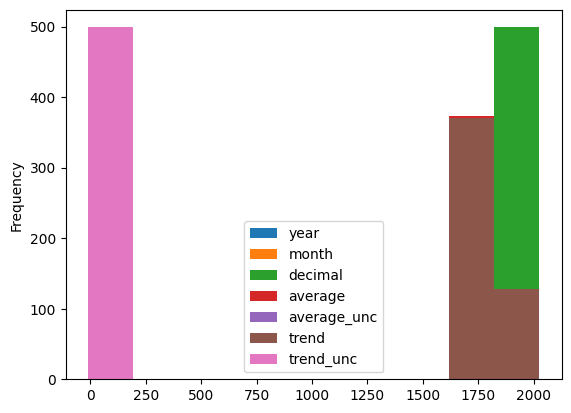

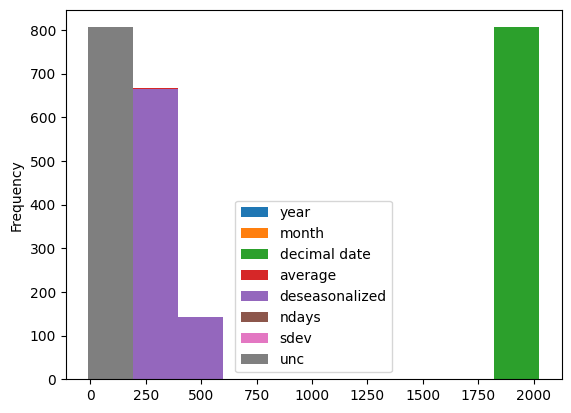

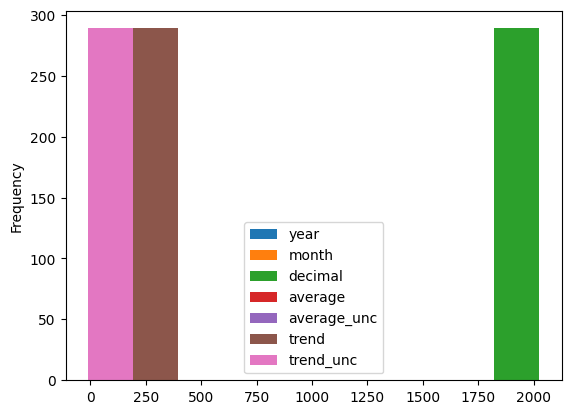

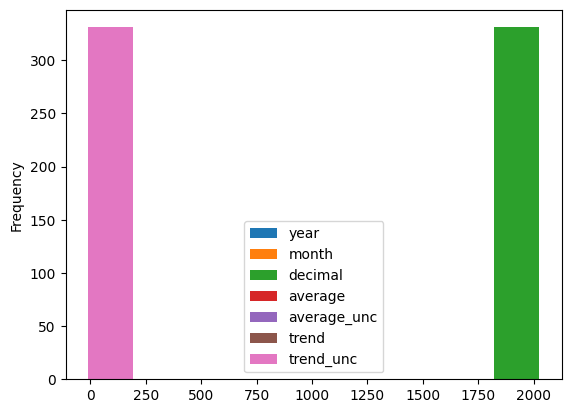

In [31]:
# Chargement des fichiers
ch4 = pd.read_csv("ch4_mm_gl.csv", comment="#")
co2 = pd.read_csv("co2_mm_mlo.csv", comment="#")
n2o = pd.read_csv("n2o_mm_gl.csv", comment="#")
sf6 = pd.read_csv("sf6_mm_gl.csv", comment="#")

# Affichage des infos clés
for name, df in zip(["CH4", "CO2", "N2O", "SF6"], [ch4, co2, n2o, sf6]):
    print(f"--- {name} ---")
    print(f"Nombre d'observations : {len(df)}")
    print(f"Période : {df['year'].min()} - {df['year'].max()}")
    print(df.head(1))
    print(df.tail(1))
    print()
ch4.plot.hist()
co2.plot.hist()
n2o.plot.hist()
sf6.plot.hist()

# 2. Sélection des données
Pour chaque jeu de données ne conserver que les variables “month“ et “average“. On supprimera donc les autres.

In [32]:
ch4 = ch4[["month", "average"]]
co2 = co2[["month", "average"]]
n2o = n2o[["month", "average"]]
sf6 = sf6[["month", "average"]]

# 3. Documentation
Se documenter puis présenter les différents gaz concernés par ces études : formule chimique, effets sur l'atmosphère, unité de mesure, etc

Dioxyde de carbone
Formule chimique: CO2
Effet sur l'atmosphère: gaz à effet de serre
Unité de mesure: ppm
Provenance: Combustion fossile
Durée de vie: 100 ans

Méthane
Formule chimique: CH4
Effet sur l'atmosphère: 25 fois plus puissant (en réchauffement) que le CO2
Unité de mesure: ppb
Provenance: Décomposition (agriculture/décharge/marais)
Durée de vie: 100 ans

Protoxyde d'azote
Formule chimique: N2O
Effet sur l'atmosphère: 300 fois plus puissant que le CO2
Unité de mesure: ppb
Provenance: Utilisation d'engrais, combustion de matière organique, etc.
Durée de vie: 120 ans

Hexafluorure de soufre
Formule chimique: SF6
Effet sur l'atmosphère: 23500 fois plus puissant que le CO2
Unité de mesure: ppt
Provenance: utilisé dans le matériel de transmission et de distribution de l'électricité
Durée de vie: supérieure à 3000 ans

# 4. Représentation par un nuage de points.
En abscisse on représentera l'indice des observations et en ordonnée la mesure du gaz en question. Interpréter les résultats obtenus.
Quels sont les deux gaz dont les émissions présentent clairement des variations saisonnières ?

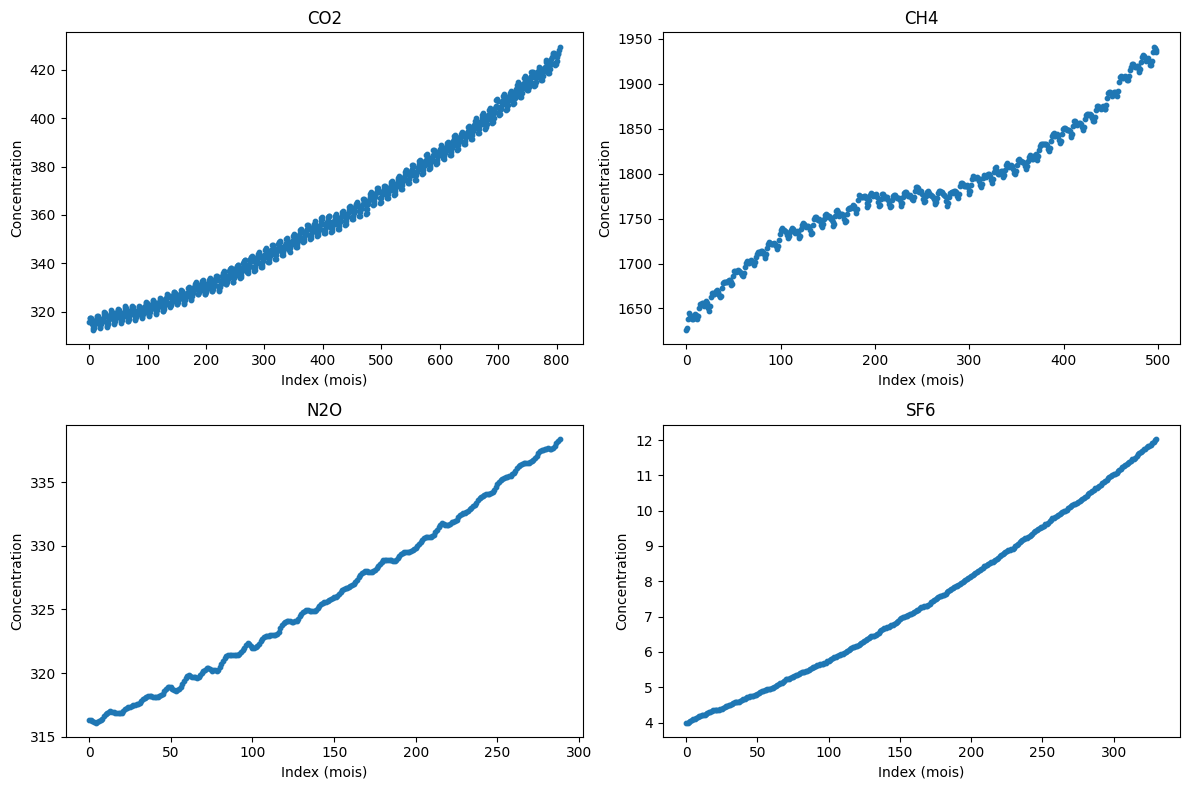

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
gaz_list = [co2, ch4, n2o, sf6]
titles = ["CO2", "CH4", "N2O", "SF6"]

for i, (df, title) in enumerate(zip(gaz_list, titles)):
    ax = axes[i//2, i%2]
    ax.scatter(df.index, df["average"], s=10)
    ax.set_title(title)
    ax.set_xlabel("Index (mois)")
    ax.set_ylabel("Concentration")

plt.tight_layout()
plt.show()

# 5. Variations saisonnières
Pour les deux gaz dont les émissions présentent clairement des variations saisonnières, on désigne par t l'indice d'un mois et par xt la mesure correspondante. On va chercher à décomposer xt et l'écrire comme la somme de deux termes, le premier représentant la tendance de fond et le second les effets de la saisonnalité

## 5.1
Calculer pour chaque mois (quand c'est possible) une moyenne mobile d'ordre 6
Pour quels mois n'est-il pas possible de calculer cette quantité ? Pourquoi ?
Interpréter cette notion de moyenne mobile. Quel sens donner à cette nouvelle série constituée des x∗t ? Pourquoi parle t-on en général de “série lissée“ à son sujet ?

In [34]:
True

True

## 5.2
Calculer la série privée de sa série lissée, i.e. St=xt−x∗t. Comment interpréter cette nouvelle série ?

In [35]:
True

True

## 5.3
Calculer les 12 coefficients mensuels c1,c2,...,c12, il s'agit pour chacun d'eux de la moyenne des termes St correspondants au mois en question. Quel sens donner à ces coefficients ?

In [36]:
True

True

## 5.4
Calculer les 12 coefficients mensuels corrigés : c′j=cj−c¯ où c¯ désigne la moyenne des 12 coefficients mensuels. Interpréter.

In [37]:
True

True

## 5.5
Calculer la série corrigée des variations saisonnières : il s’agit de la série de données résultant des différences entre les données initiales et les coefficients mensuels corrigés correspondant. La représenter. Interpréter.

In [38]:
True

True

## 5.6
Calculer l’équation de la droite de régression de la série corrigée des variations saisonnières. La représenter.  Cette droite s’appelle “trend“ ou “tendance“. Interpréter cette notion.

In [39]:
True

True

## 5.7
Effectuer des prévisions pour chacun des mois des deux prochaines années. Pour un mois donné il s’agit de la somme de la valeur de la tendance correspondante à ce mois et du coefficient mensuel corrigé. Interpréter cette méthode de prévision.

In [40]:
True

True

## 5.8
A quoi peuvent être dues les variations saisonnières observées ?

# 6.
On va maintenant chercher à décomposer xt en l'écrivant comme le produit de deux termes, le premier représentant la tendance de fond et le second les effets de la saisonnalité :

## 6.1
On définit la série lissée de la même façon que précédemment.

## 6.2
Calculer la série divisée par sa série lissée, i.e. St=(Xt)/(X∗t).

Comment interpréter cette nouvelle série ?

## 6.3
Mêmes calculs des coefficients mensuels.

## 6.4
Calculer les 12 coefficients mensuels corrigés :
c′j=cj/c¯ où c¯ désigne la moyenne des 12 coefficients mensuels. Interpréter.

## 6.5
Calculer la série corrigée des variations saisonnières : il s’agit de la série de données résultant des quotients entre les données initiales et les coefficients mensuels corrigés correspondant. La représenter. Interpréter.

## 6.6
Même calcul de la tendance que précédemment.

## 6.7
Effectuer des prévisions pour chacun des mois des deux prochaines années. Pour un mois donné il s’agit du produit de la valeur de la tendance correspondante à ce mois et du coefficient mensuel corrigé. Interpréter cette méthode de prévision.

# 7. Comparer
Comparer les démarches des questions 5 et 6. Laquelle vous semble la plus pertinente dans notre contexte ?

# 8.
Pour les deux gaz dont les émissions ne présentent pas clairement des variations saisonnières, on va effectuer une régression linéaire :

## 8.1
Calculer le coefficient de corrélation.

## 8.2
Déterminer l'équation de la droite de régression et la représenter par dessus le nuage de points.

## 8.3
Effectuer des prévisions pour chacun des mois des deux prochaines années.

## 8.4
Reprendre les trois questions précédentes avec une régression exponentielle. Ce modèle est-il plus pertinent que le modèle linéaire ?

# 9.
Reprendre les deux gaz de la question 5, i.e. ceux dont les émissions présentent clairement des variations saisonnières, et pour chacun d'eux mener l'étude suivante :

## 9.1
Créer un nouveau dataset en agrégeant les valeurs de la variable "average" par année. Il comportera donc une variable "year".

## 9.2
Construire un nuage de points avec en abscisse l'indice des observations et en ordonnée les émissions correspondantes.

## 9.3
Calculer le coefficient de corrélation.

## 9.4
Déterminer l'équation de la droite de régression et la représenter par dessus le nuage de points.

## 9.5
Effectuer des prévisions pour chacune des deux prochaines années.

## 9.6
Reprendre les trois questions précédentes avec une régression exponentielle. Ce modèle est-il plus pertinent que le modèle linéaire ?